# <center> Various Methods to handle Overfitting</center>

##### This Notebook is dedicated to understand the implementation for handing various overfitting technique in Neural Network

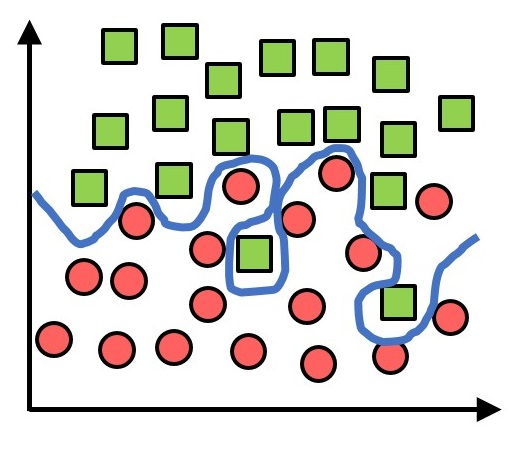

### <center>Overfitting is like memorizing question for examination</center>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
X,y=make_circles(n_samples=500, noise=0.1,random_state=1)

<Axes: >

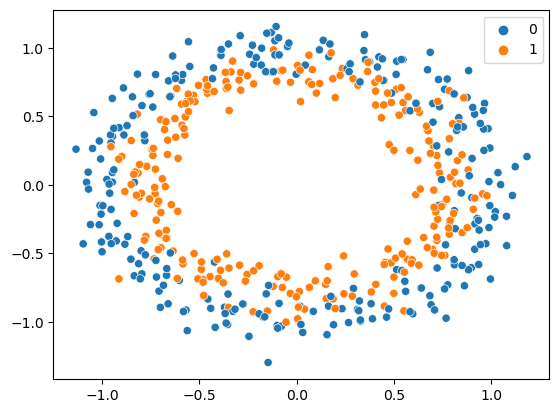

In [3]:
sns.scatterplot(x=X[:,0],y=X[:,1],  hue=y)

In [4]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
# Creating Architecture
model=Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Fitting
history=model.fit(X_train, y_train, validation_split=0.2, epochs=500, verbose=0)

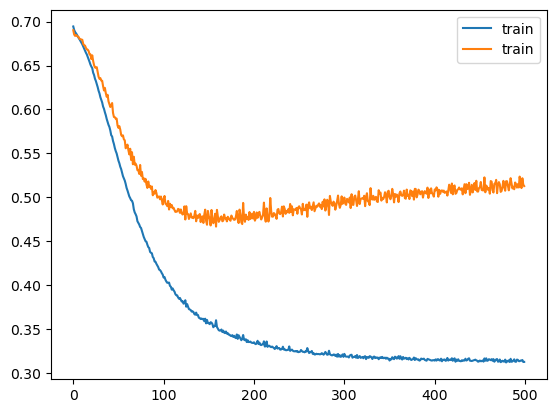

In [8]:
# Plotting Loss and validation loss graph
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='train')
plt.legend()
plt.show()

9600/9600 [==============================] - 11s 1ms/step


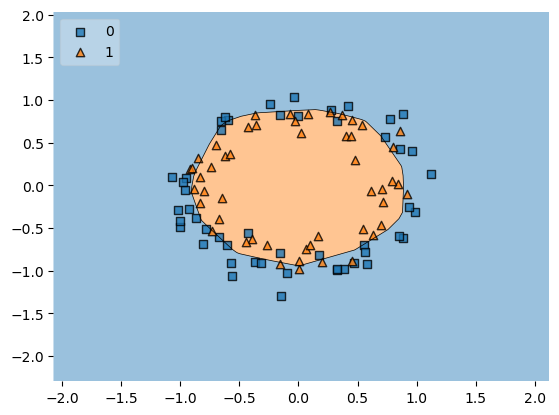

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()

# 1. Early Stopping

Stops training before overfitting: [Info](https://keras.io/api/callbacks/early_stopping/)

In [10]:
# Model 1
model_1=Sequential()
model_1.add(Dense(256, input_dim=2, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [11]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Implementing Early Stopping
callback=EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False)

In [13]:
history=model_1.fit(X_train, y_train, validation_split=0.2, epochs=3500, callbacks=callback,verbose=0)

Epoch 160: early stopping


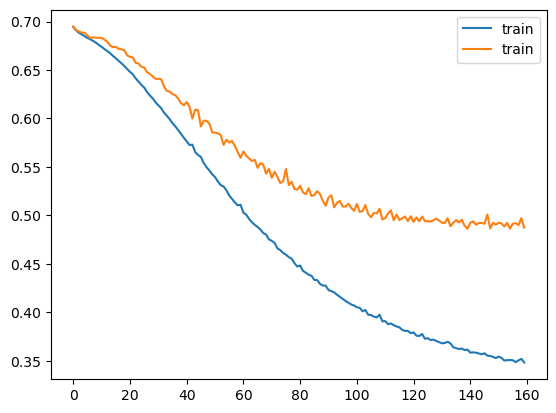

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='train')
plt.legend()
plt.show()

9600/9600 [==============================] - 11s 1ms/step


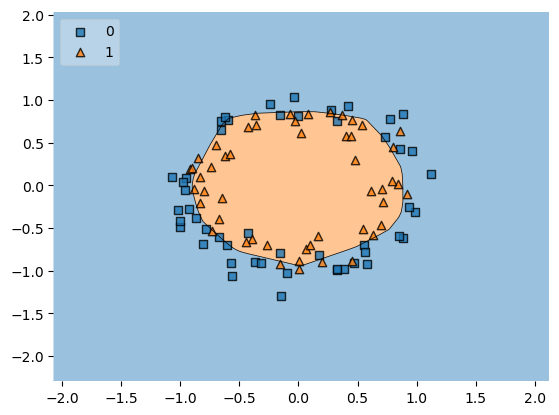

In [15]:
plot_decision_regions(X_test, y_test.ravel(), clf=model_1, legend=2)
plt.show()

# 2. Dropout

Remove perceptron in each iteration: [Info](https://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf) 

In [16]:
# Model 2
model_2=Sequential()
model_2.add(Dense(256, input_dim=2, activation='relu'))
# Implementation of Dropout
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='sigmoid'))

In [17]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history=model_2.fit(X_train, y_train, validation_split=0.2, epochs=500, verbose=0)

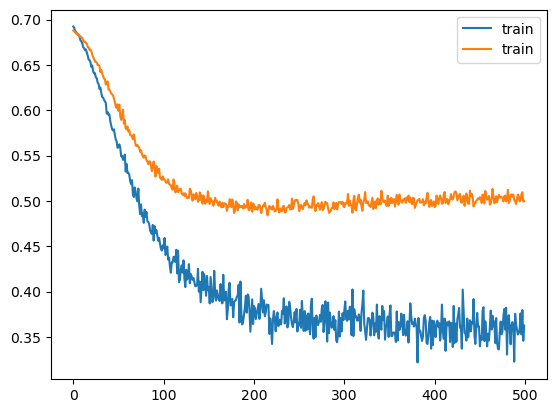

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='train')
plt.legend()
plt.show()

9600/9600 [==============================] - 11s 1ms/step


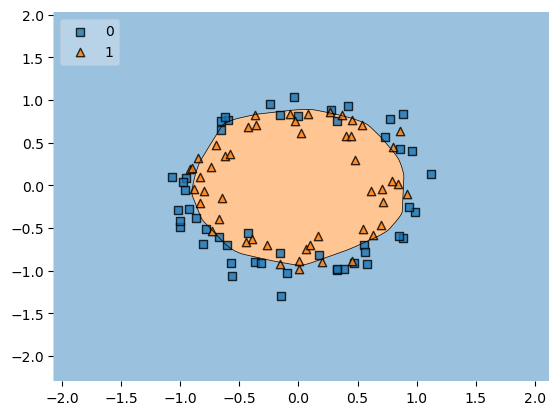

In [20]:
plot_decision_regions(X_test, y_test.ravel(), clf=model_2, legend=2)
plt.show()

# 3. Regularization

Decrease value of weight by adding penalty: [Info](https://c3.ai/introduction-what-is-machine-learning/regularization/)

In [21]:
# Model 3
model_3=Sequential()
# Implementing l2 regularization
model_3.add(Dense(256, input_dim=2, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.05)))
model_3.add(Dense(1, activation='sigmoid'))

In [22]:
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history=model_3.fit(X_train, y_train, validation_split=0.2, epochs=500, verbose=0)

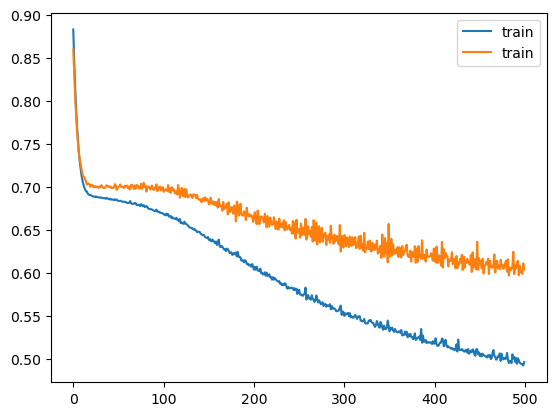

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='train')
plt.legend()
plt.show()

9600/9600 [==============================] - 12s 1ms/step


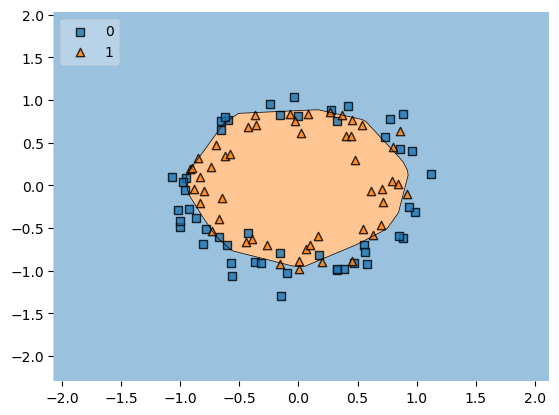

In [25]:
plot_decision_regions(X_test, y_test.ravel(), clf=model_3, legend=2)
plt.show()

# Plotting

## 1. BoxPlot : Outlier

In [26]:
model_wt_layer1=model.get_weights()[0].reshape(512)
model1_wt_layer1=model_1.get_weights()[0].reshape(512)
model2_wt_layer1=model_2.get_weights()[0].reshape(512)
model3_wt_layer1=model_3.get_weights()[0].reshape(512)

<Axes: >

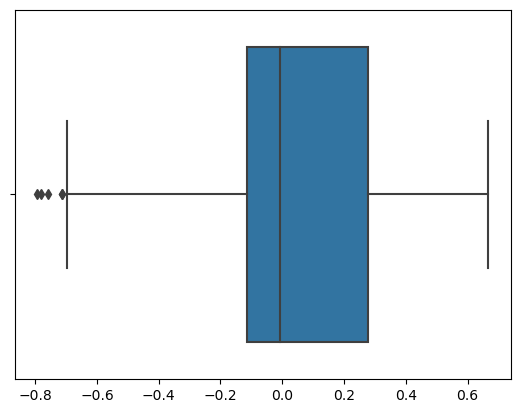

In [27]:
# No Overfitting manipulation
sns.boxplot(x=model_wt_layer1)

<Axes: >

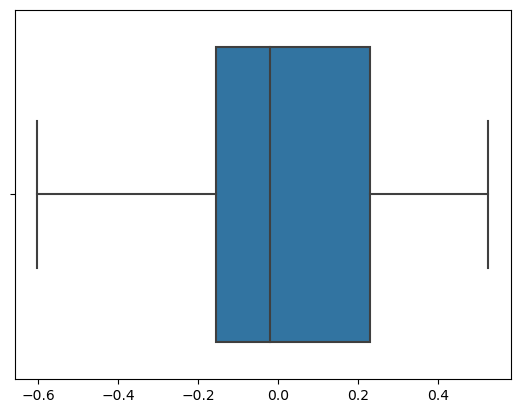

In [28]:
# Model 1 : Early Stopping
sns.boxplot(x=model1_wt_layer1)

<Axes: >

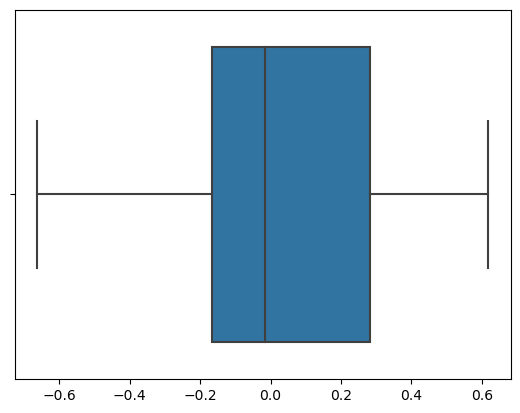

In [29]:
# Model 2: Dropout
sns.boxplot(x=model2_wt_layer1)

<Axes: >

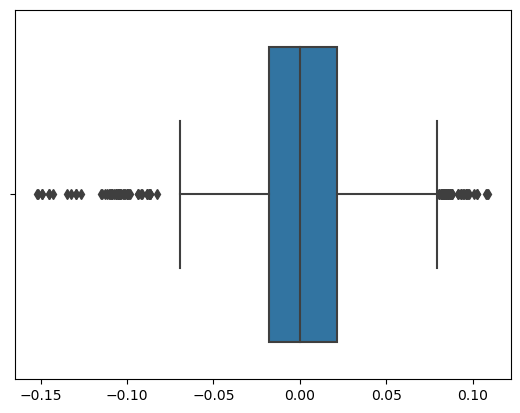

In [30]:
# Model 3: Regularization
sns.boxplot(x=model3_wt_layer1)

## 2. Probability Density Function

/tmp/ipykernel_20/319730060.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_wt_layer1)


<Axes: ylabel='Density'>

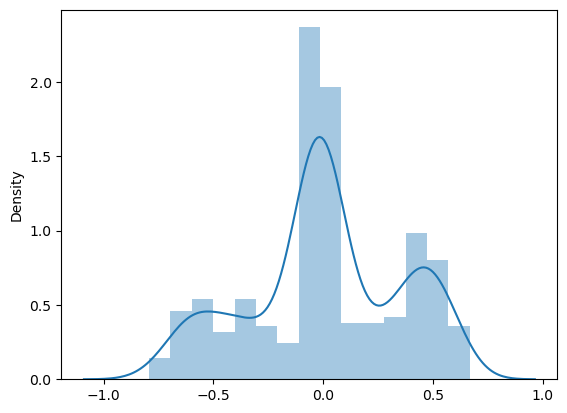

In [31]:
# No Overfitting Manipulation
sns.distplot(model_wt_layer1)

/tmp/ipykernel_20/2035403067.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_wt_layer1)


<Axes: ylabel='Density'>

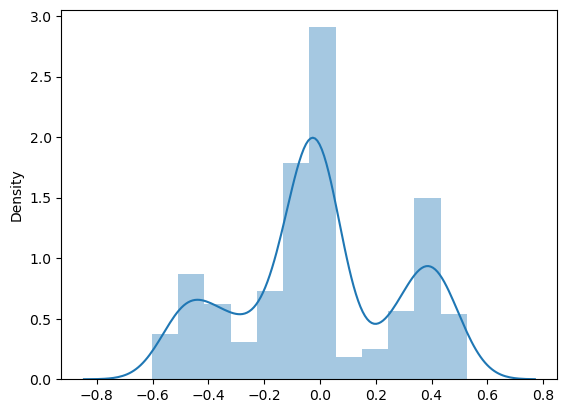

In [32]:
# Model 1 : Early Stopping
sns.distplot(model1_wt_layer1)

/tmp/ipykernel_20/2618215260.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_wt_layer1)


<Axes: ylabel='Density'>

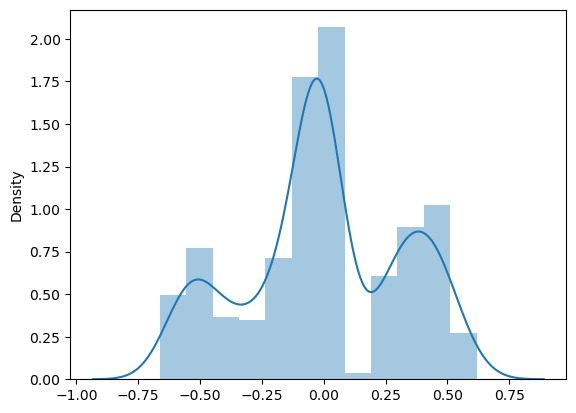

In [33]:
# Model 2: Dropout
sns.distplot(model2_wt_layer1)

/tmp/ipykernel_20/2309642827.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model3_wt_layer1)


<Axes: ylabel='Density'>

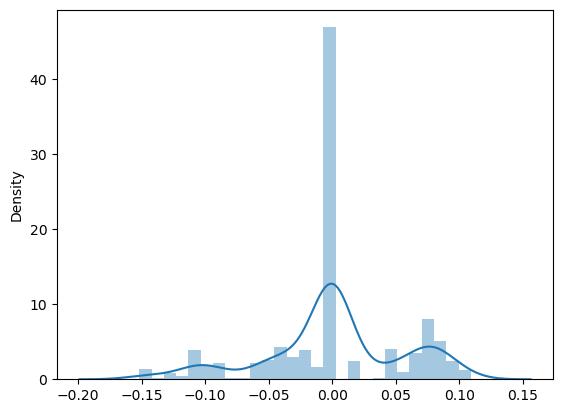

In [34]:
# Model 3: Regularization
sns.distplot(model3_wt_layer1)